# Diabetes Prediction with Decision Tree and Random Forest Classifiers

## INFO:

### General:
This notebook contains three primary elements regarding the dataset and the model used for the streamit app. The first element is the general EDA where somedata quality analysis and data visualisation takes place. Given the realtively low number of observations in the dataset, not much was done in terms of outlier removal but some 0-values that were non-sensical (such as Blood Pressure = 0) were filled with the mean of the variable. The second element is the Data Preparation stage, where the data is cleaned (basic feature engineering is performed), split into training and testing datasets and scaled using the Standard Scaler (this is done to prevent undue weigthing of variables with larger absolute values). The fitted Scaler is also exported here as a pkl file to allow the streamlit application to make use of the exact same scaler as this notebook. Finally, the third larger element in this notebook is the training and evaluation of the model(s). Here, I should note that I first looked at a Decision Tree model, but then chose to stick with my initial plan of doing a Random Forest classifier model. 

### Dataset:
The dataset used here is the 'diabetes.csv' dataset originally used in this class for the binary keras classification model in the ANN folder. It features various health-factor variables assumed to be indicative of a potential presence of Diabetes. The dataset doesn't seem to have an ymissing values, although there are a number of features that have (as mentioned above) non-sensical 0-values which is likely due to that "patient" not having these figures available at the time of the testing (?). One issue that should be mentioned is that the dataset is quite small, which could (and will as we will see below) cause the model trained on it to be of mediocre predictive power.

### Model:
For this dataset I wanted to go with either a decision tree or a random forest model. There are multiple reasons for thischoice of models. Firstly, these models are highly effective at capturing non-linear relationships between features and the target variable, which is important given that many features in the dataset, such as "Glucose," "BMI," and "Age," likely have complex, non-linear interactions with the outcome. Secondly, Decision Trees and Random Forests can handle both categorical and continuous variables, which is crucial since the dataset includes both types of features. Finally, Random Forests offer the additional advantage of providing feature importance metrics, allowing us to identify which variables most significantly influence the prediction of the outcome, further enhancing the model’s interpretability and insights. The model finally used in the 'model.pkl' file is a Random Forest classifier model (with n_estimators = 150) that uses all features of the dataset (except for the target feature: Outcome) to predict a person's Diabetes status. (Note: The reason I did not perform any GridSeach or Hyperparameter Tuning is manifold. First, I felt that using 150 as n_estimators was sufficent to create a relevant model while also maintaing a balance between model performance maximisation and the use of computational resources. Furthermore, I felt that given that we used this n_estimators in our previous Random Forest models, this presented a good default value to work with. Also, I feared that my lack of experience in handling these features would blow up in my face when implementing the model later on). 

### On the commentary of the code:
In this notebook you will find two types of comments. First, I went through every block of code and explained what it does (line by line or the whole block depending on the code). For this type of comments, I tried my best to not comment on similar code twice. Second, after every block of code, there is a markdown block where I explain my rationale, interpret the output and explain what conclusions I draw from those outputs/how they impact my next steps (sometimes not all of these aspects are present/make sense so this is just a general rule and not 100%). The in-code # comments are sometimes left out with very obvious code but I tried to be as small-scale as possible as I wasnt sure what exactly you wanted from the code comment aspect of this assignment.

In [284]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

## Data Loading and Basic EDA

In [285]:
df = pd.read_csv('/Users/vitusschlereth/Desktop/MBD/MLII/Individual Assignment/diabetes.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Summary Statistics

In [286]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Checking for Missing Values

In [287]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This code shows us that there are no Null-Values in the dataset, meaning we do not have any reason at this point to drop any rows.

### Boxplots for Outlier Detection

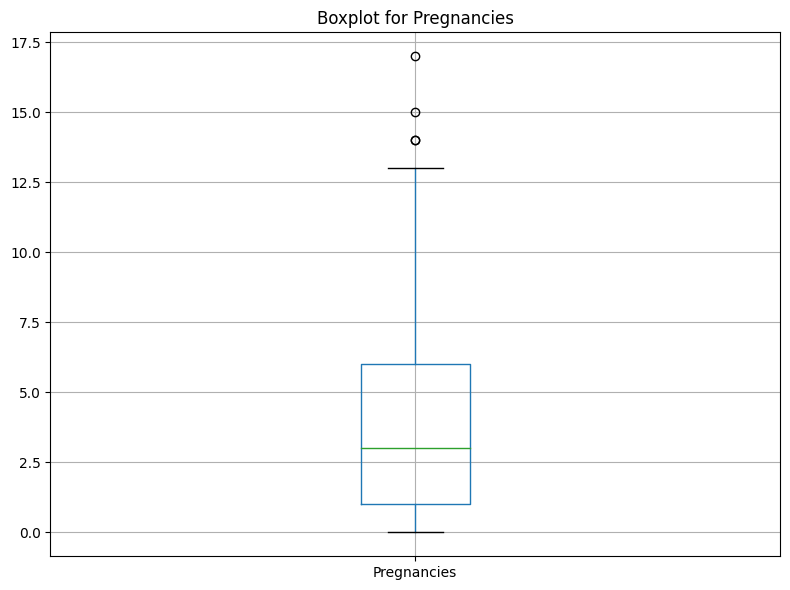

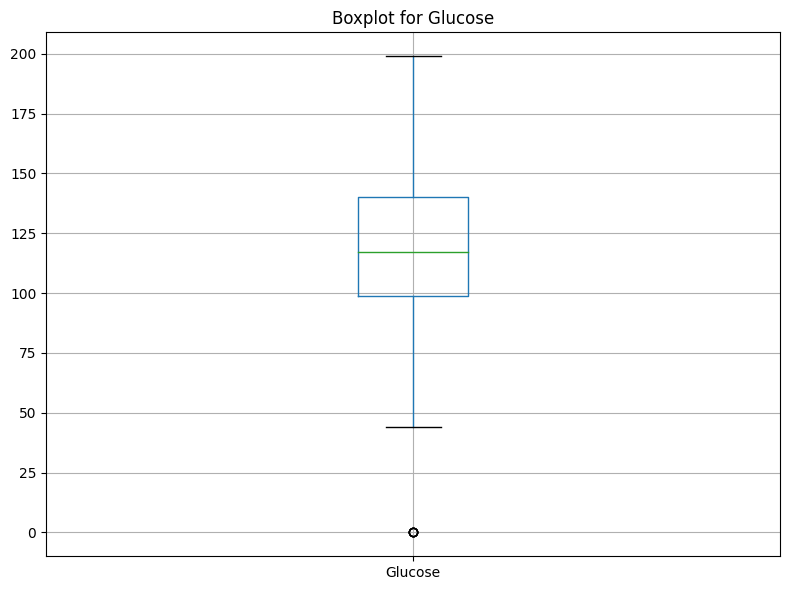

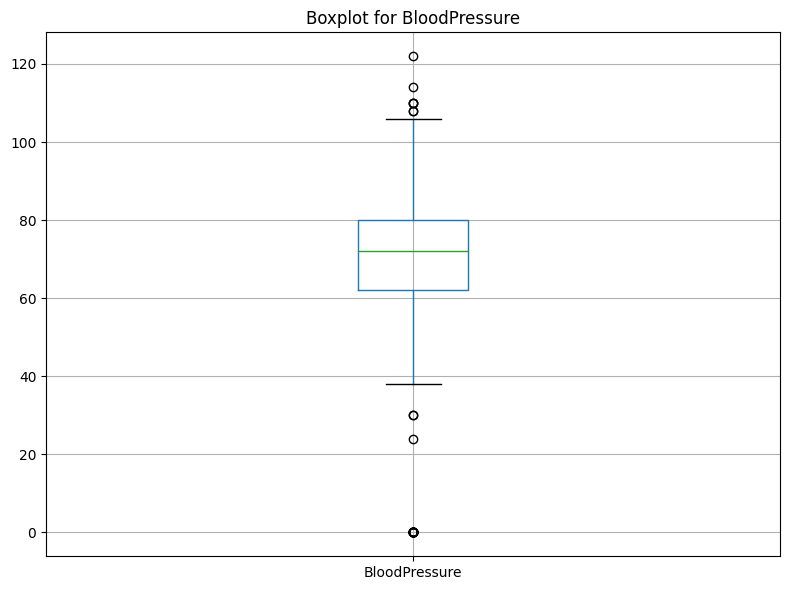

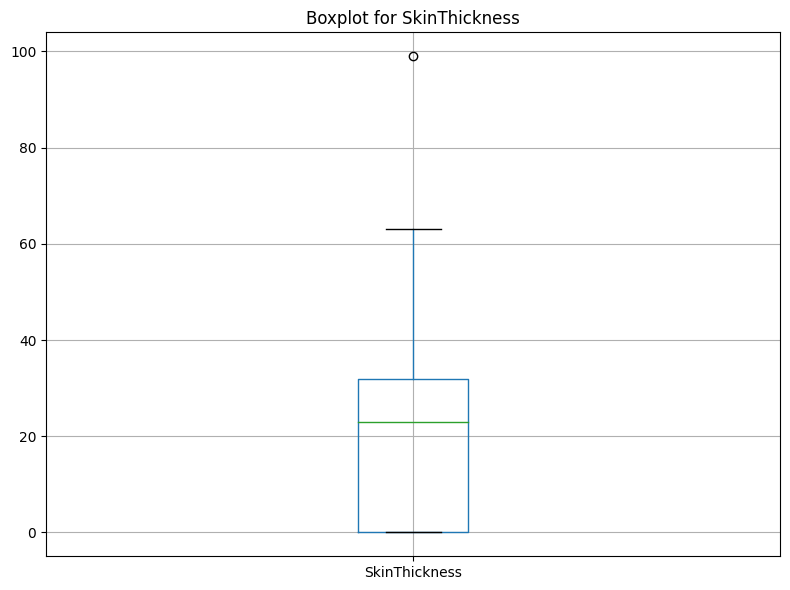

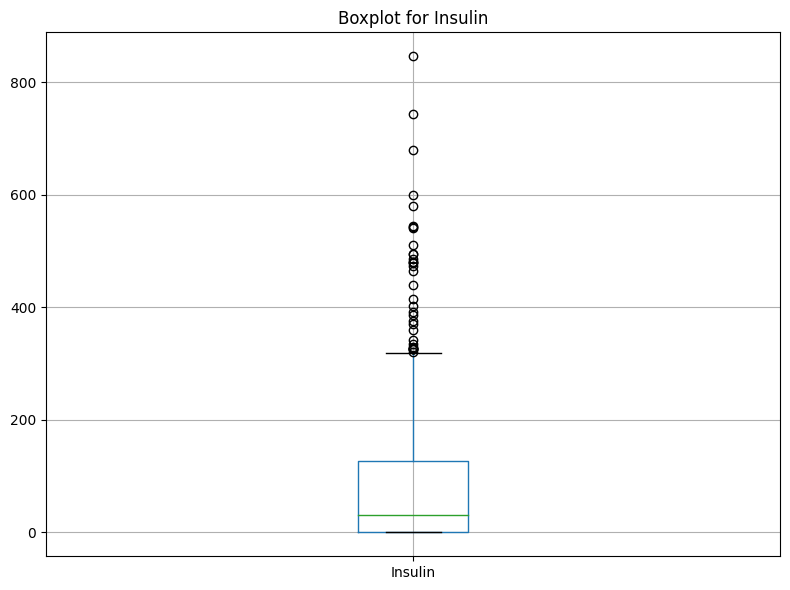

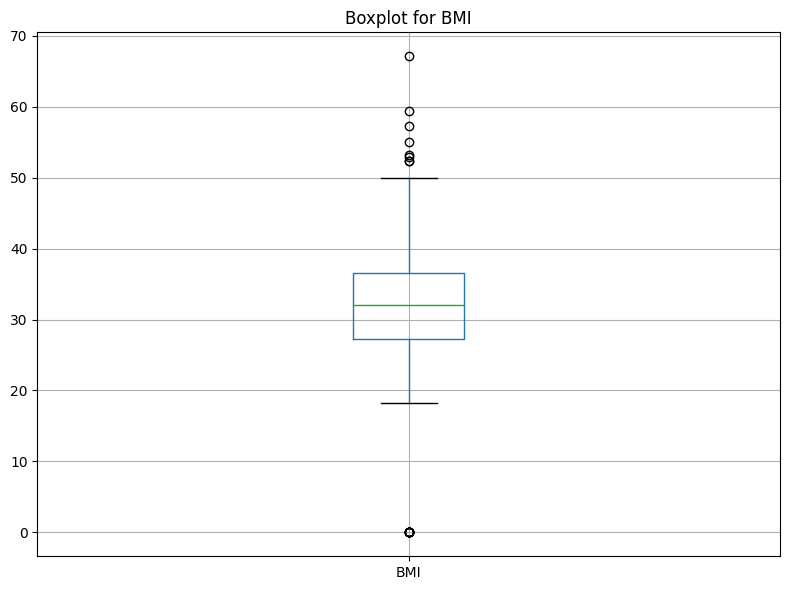

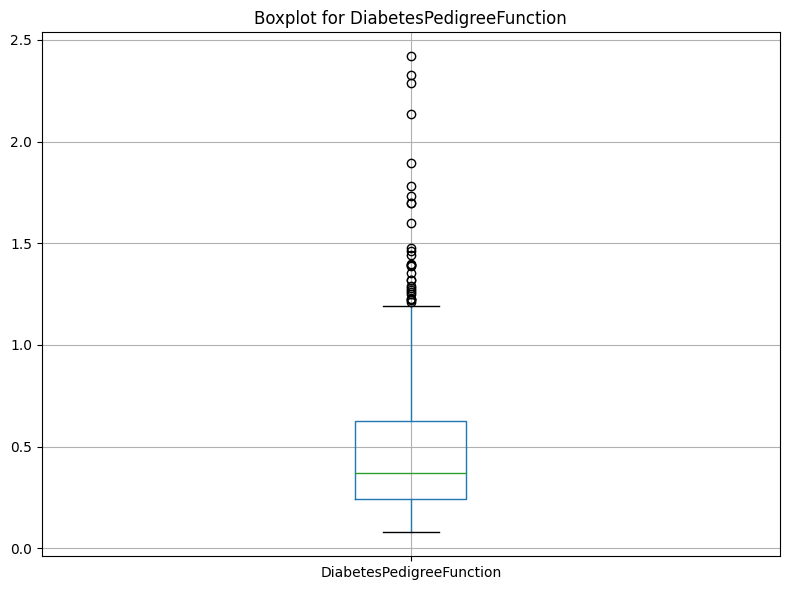

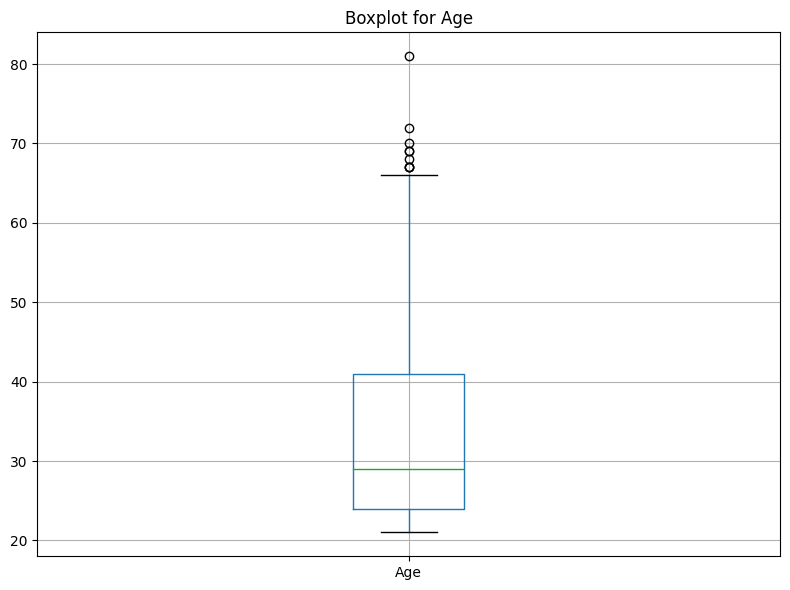

In [288]:
numeric_data = df.drop(columns='Outcome')

numeric_columns = numeric_data.columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    numeric_data.boxplot([column])
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()
    plt.show()


Here I created some Boxplots to look at the potential issue of outliers in the feature variables. We can see that only Insulin and the DiabetesPedigreeFunction variables have a signficant amount of extreme values that lie beyond the interquartile range "threshold". For the DPF variable, removing the outliers would not make sense, as the variable represents a measure for genetic predisposition, meaning that high values have real and important implications for diabetes prediction. The same holds true for the Insulin variable as insulin levels that are very high or very low could be indicative of abnormal metabolic states or treatment responses. Removing them could potentially ignore patients in critical medical conditions that are key to this analysis.

Thus, I believe that no outlier removal is necessary. 

### Visualizing Feature Distributions

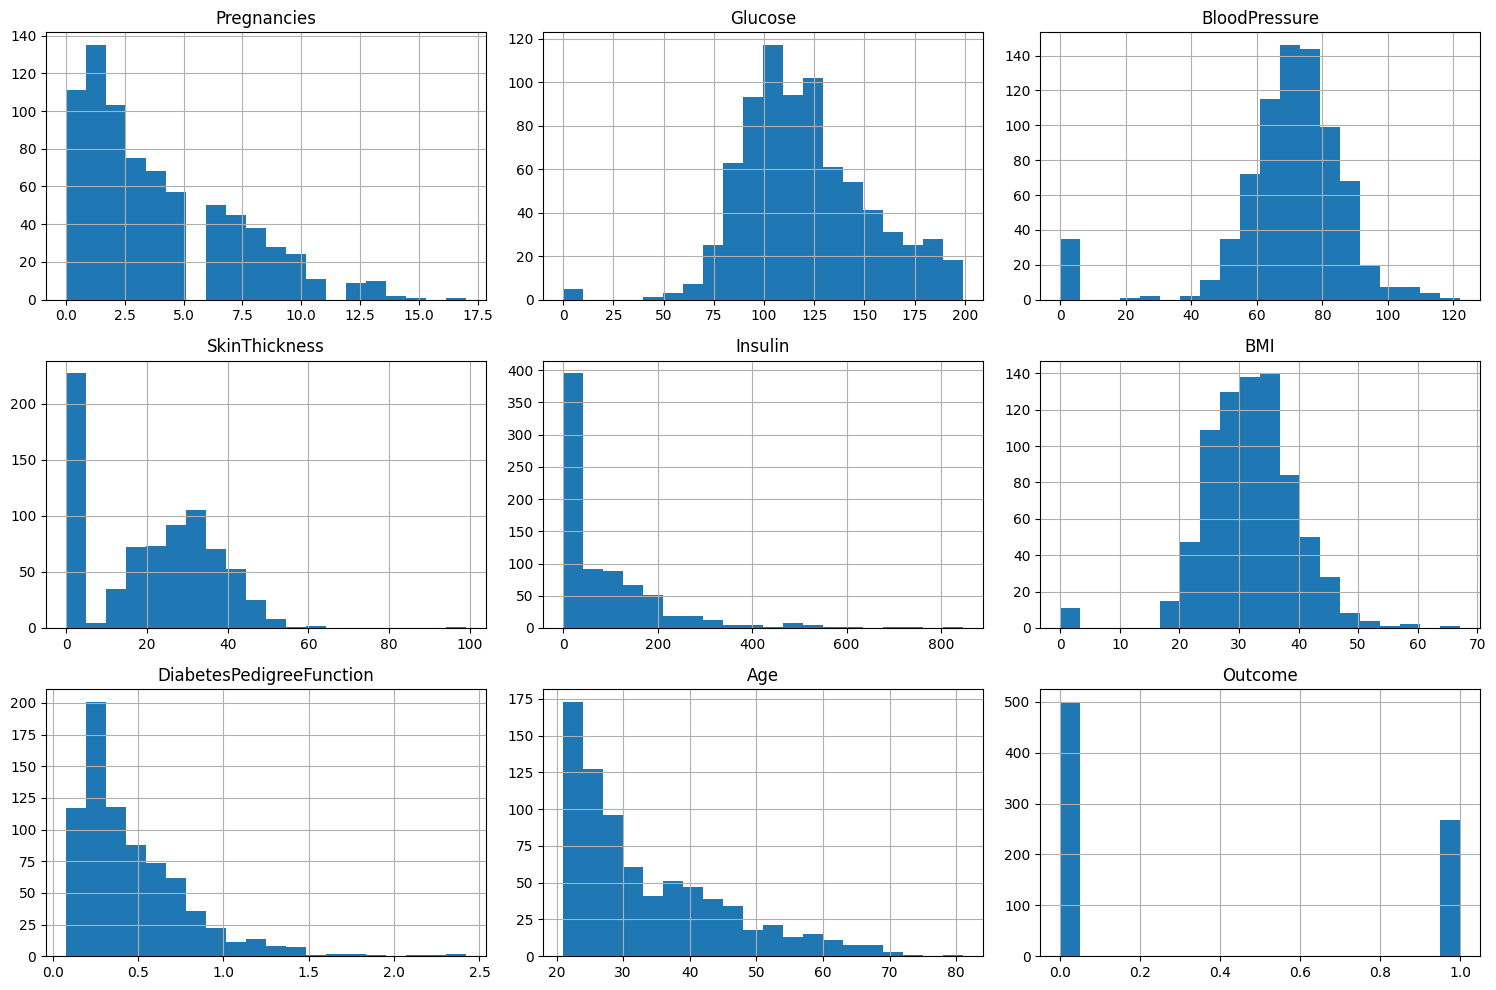

In [289]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


This code uses built-in pandas functions and pyplot to create histograms for each variable in the dataset. This is a very efficient way to get a first look into the structure of the variables themselves and reveals a few interesting insights that guide further action below. Primarily, two interesting observations stand out. First, we can see that a few of the continuous variables (namely SkinThcikcness, Insulin, BMI, Glucose and BloodPressure) could have have a sizeable amount of "0" values, which dont really make sense (nobody thats alive has 0 Blood pressure, BMI or Glucose); technically an Insulin level of 0 is physically possible but it would mean total pancreatic failure which is very rare even in diabetics. Below this code I created a count of the 0 values in the Insulin variable and it returned 374 rows, meaning that there are more 0 values for insulin than there are diabetics in the dataset. THus, I believe it makes sense to see this as non-sensical as well.

In [290]:
insulin_zero_count = (df['Insulin'] == 0).sum()
insulin_zero_count

374

### Stacked Histograms

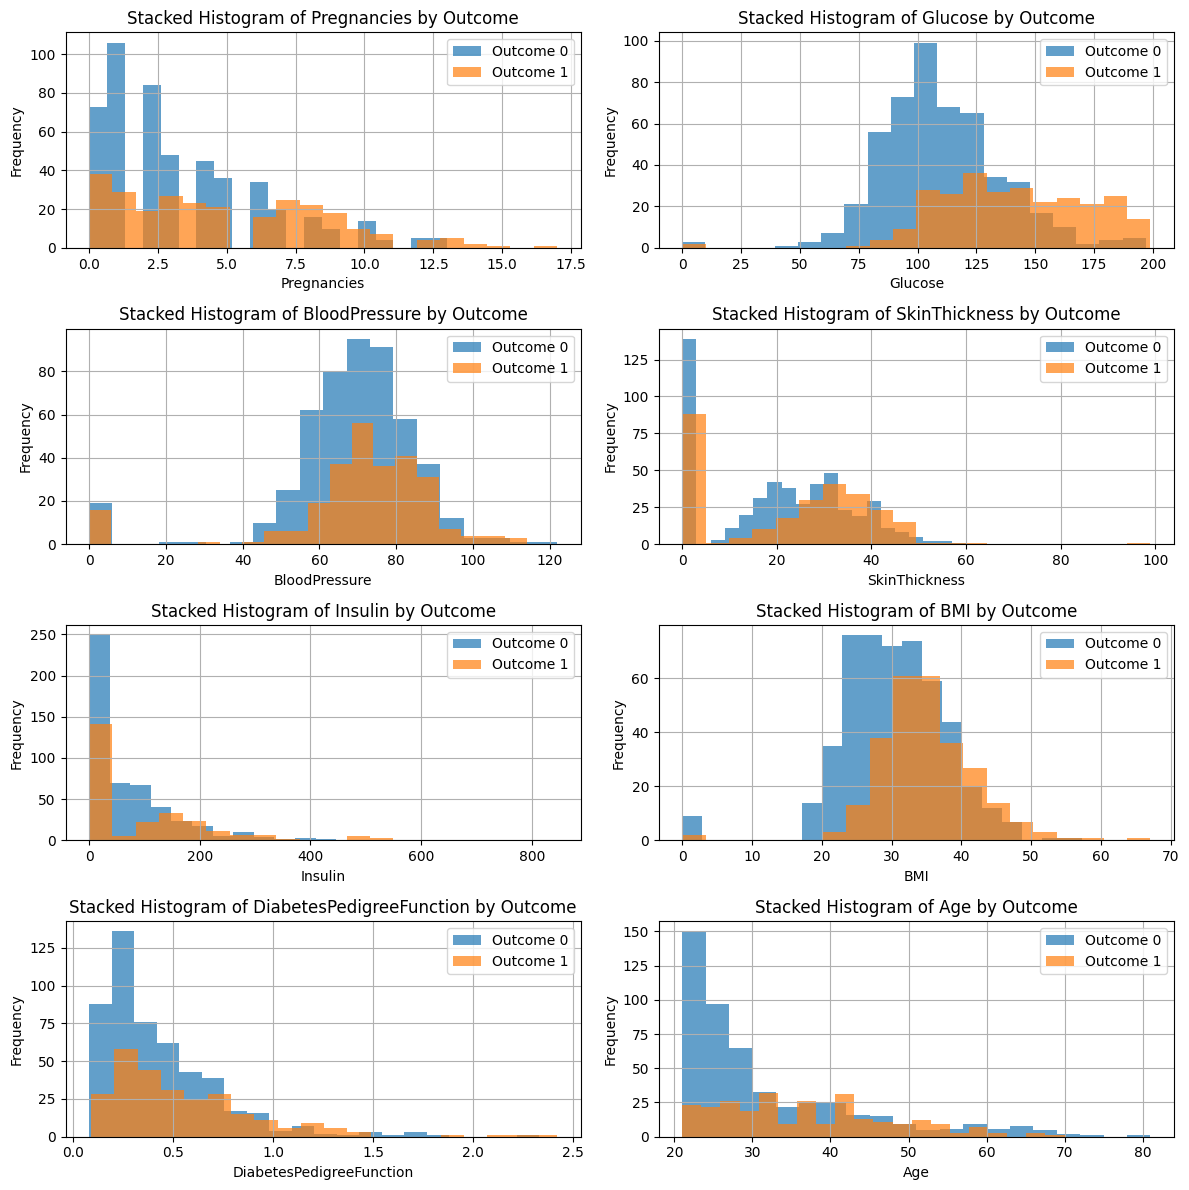

In [291]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    df.groupby('Outcome')[feature].hist(alpha=0.7, stacked=True, bins=20)
    plt.title(f"Stacked Histogram of {feature} by Outcome")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(['Outcome 0', 'Outcome 1'])
plt.tight_layout()

plt.show()

This code gives me the histograms I created above but here, I made the code stack the histogram so as to (1) visualise some basic info on the realtionships between the features and the target (we can see some patterns in the distribution) and (2) to check on my assumption that the 0 levels for things such as glucose and insulin are actually non-sensical. As we can see, half of the 0 insulin values come from non-diabetic patients, which is impossible, thus strengthening my conviction that these values have to be missing values or errors of some kind in the collection/capturing of the data. THis gives my paln to imoute these values even more validity.

### Correlation Matrix

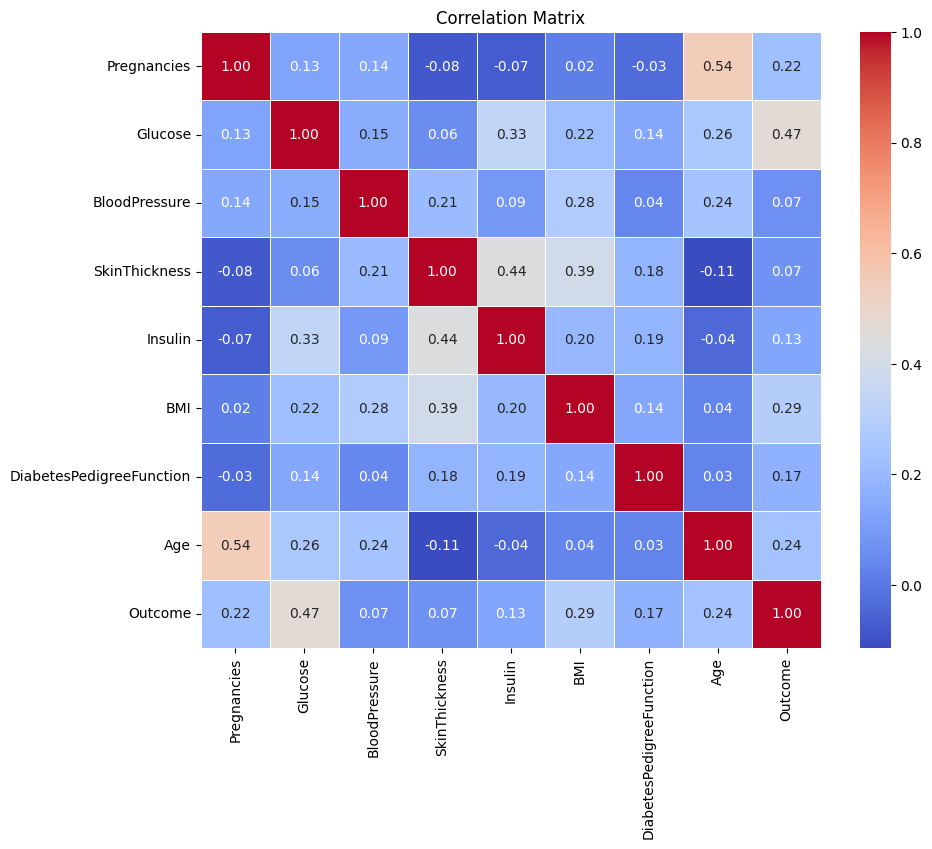

In [292]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('Corr.Matrix.png')
plt.show()
plt.close()


Now I use pyplot and seaborn to create a correlation matrix to determine whether there is any higly concerning correlation between the variables. All in all, only one correlation reaches the mark of +/- 0.5 (namely Pregnancies - Age; this chigh level of correlation makes sense and was to be expected as obviously older people tend to have more pregancies in their past than younger people; all in all this is no cause for concern for the model itself ). This means that while there is some correlation it is not reaching concerning levels, meaning all features can be used without concern.

### Pairplot to Analyze Relationships

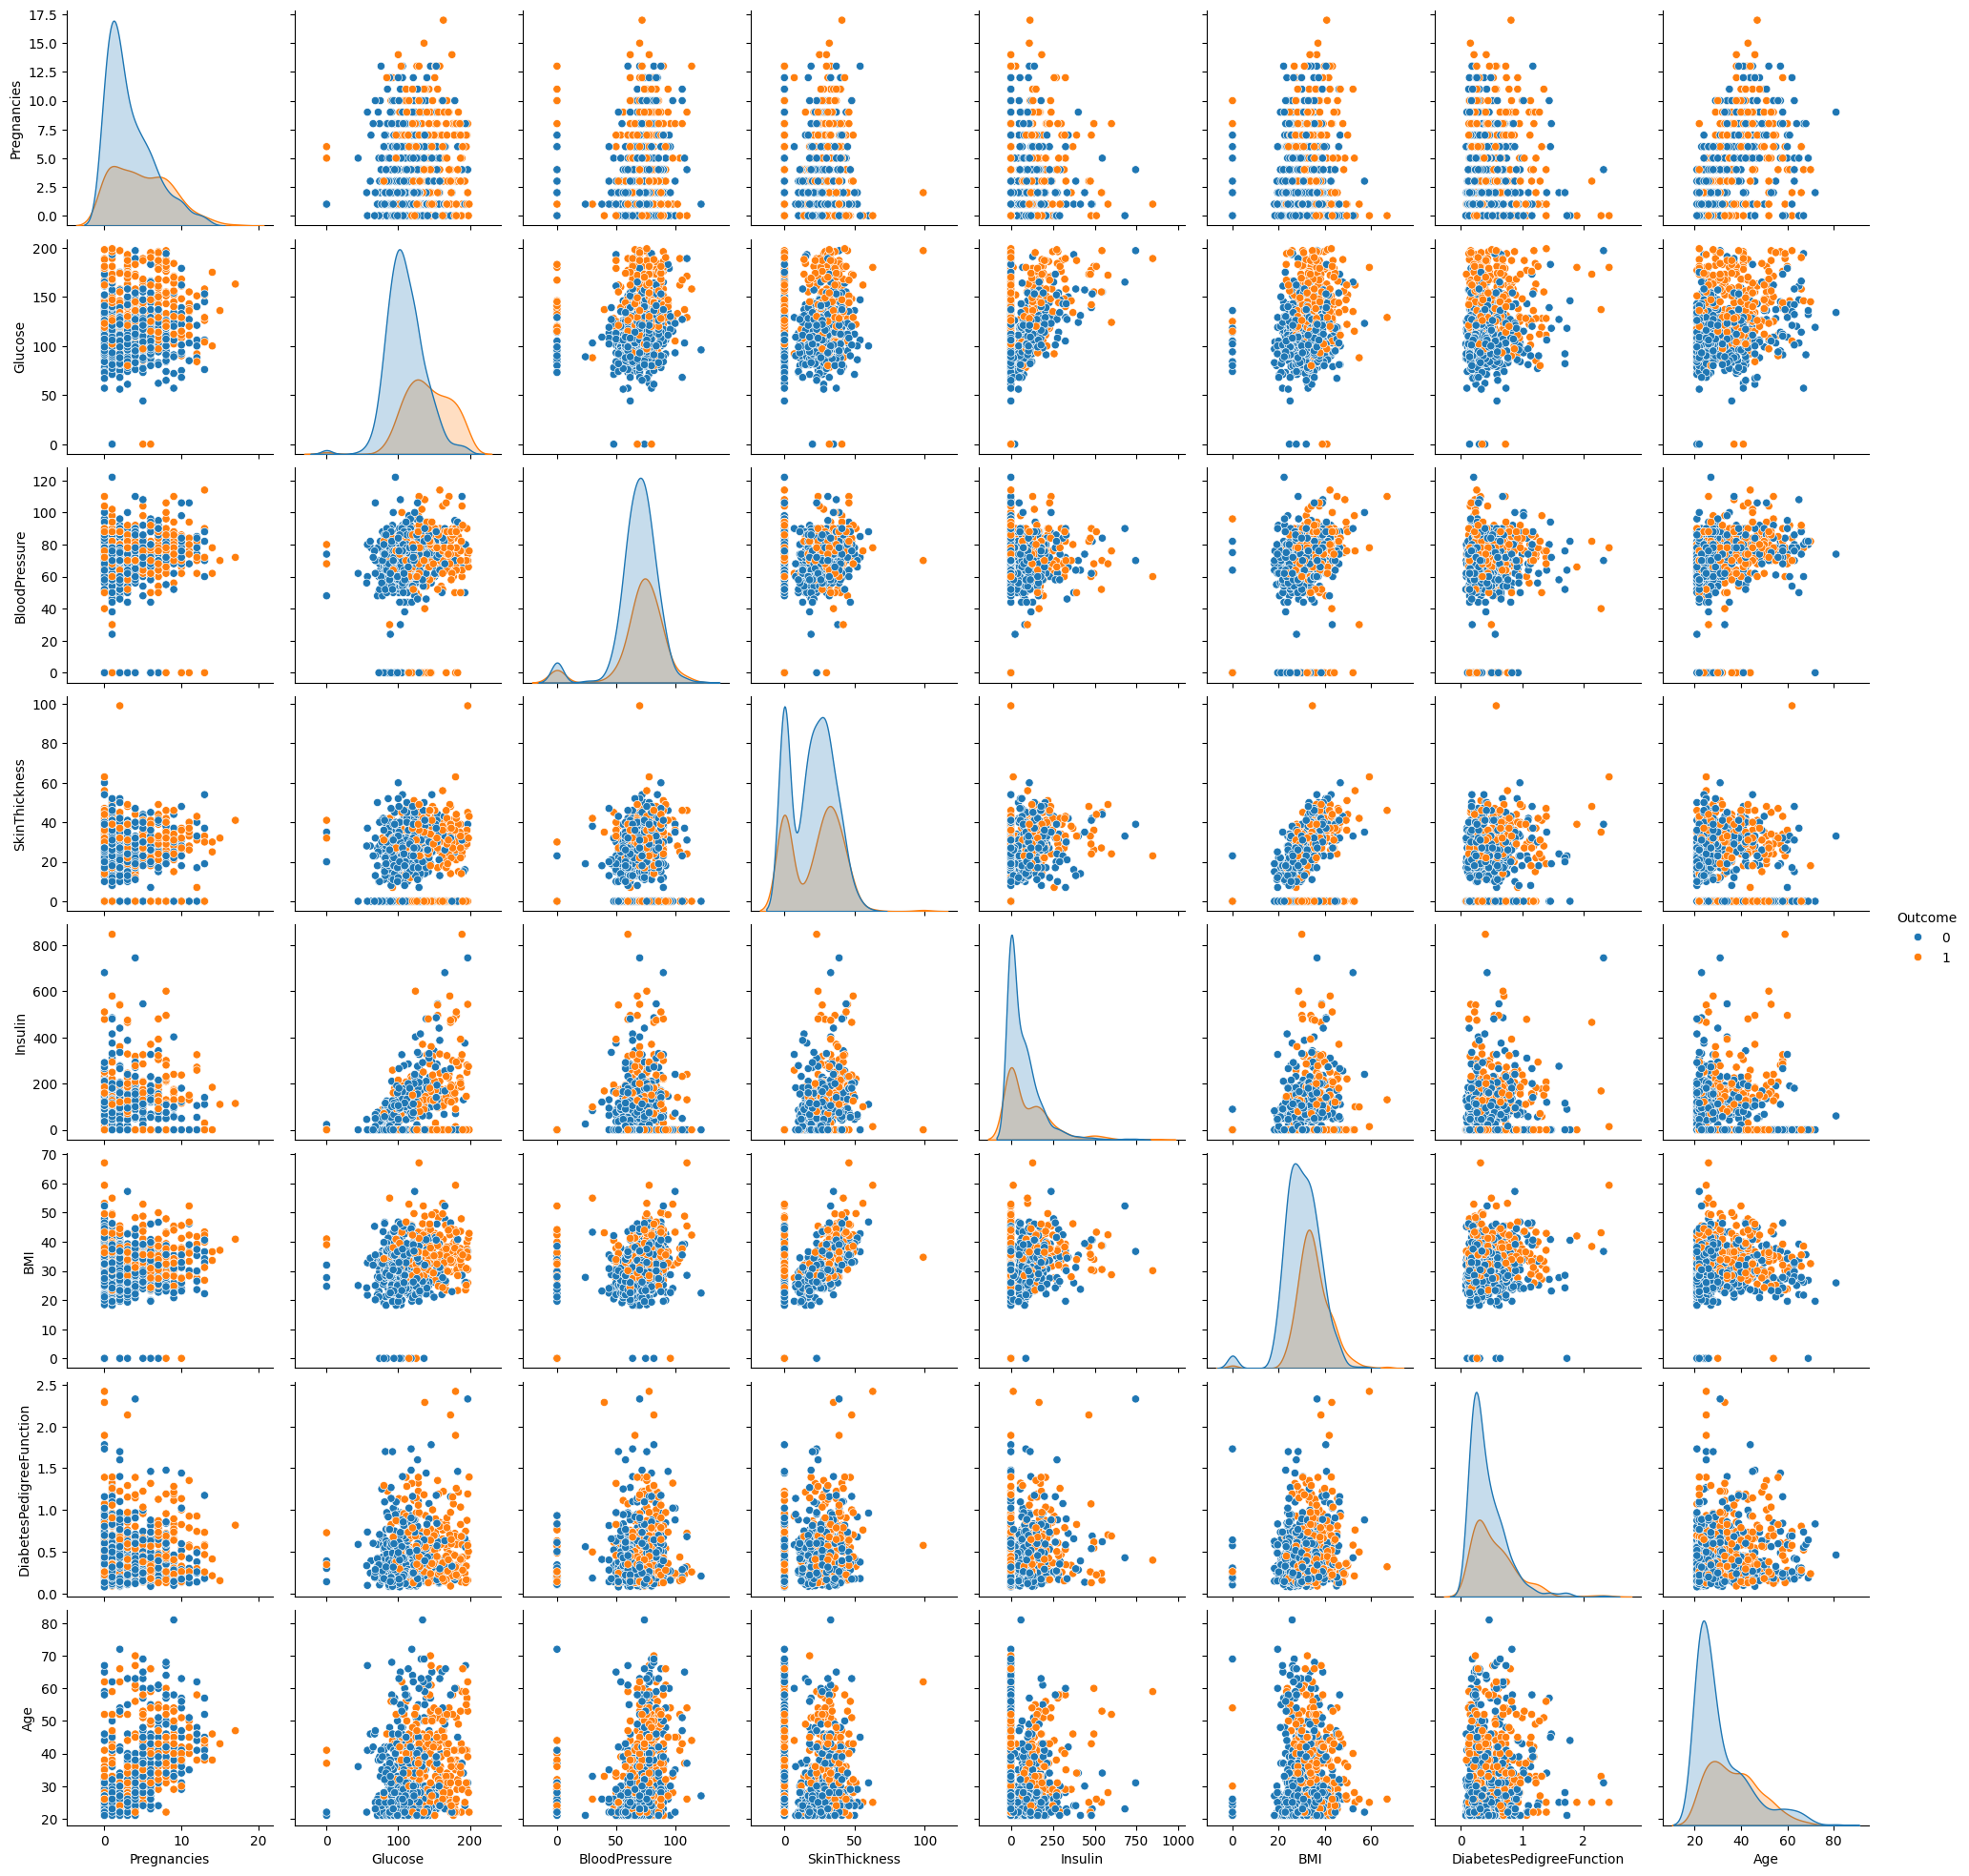

In [293]:
sns.pairplot(df, hue='Outcome')
plt.show()

This code essentially shows a pairplot for each variable combination in the dataset (except again for the target variable itself). This just serves again to look into potential interplay between the individual features but no concerning patterns are found in my opinion. The reason I made the notebook display them all at once is that viewing them one at a time would make ti diffcult to judge them in relation to one another and would be harder to naviagte simply because you could lose track. From some of these plots we can clearly see the issue I already pointed out at the beginning of the notebook in the overview andafter the histograms above. namely the issue of non-sensical 0 values. BAsed on this, I decided to impute these 0 values with the mean of each variable respectively. 

## Feature Engineering - Handling 0 Values

In [294]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_impute:
    mean_value = df[df[column] != 0][column].mean()
    df[column] = df[column].replace(0, mean_value)

I want to slightly expand on the feature engineering element inserted here. I saw that you did not handle these 0 values the same way in the ANN notebook for the diabetes.csv dataset and maybe there is a reason for that that I am missing, but I want to quickly make my case here as to why I think it makes sense to handle them this way. Imputing the 0 values for those variables where 0 does not make sense as a value (nobody thats alive has 0 blood pressure or 0 glucose or 0 skin thickness), making it unlikely that these are acutal and real values. This leads me to believe that they are either errors in the data gathering process or were intentionally zeroed for some other reason (maybe they were unknown at the time of gathering the data entries) that I am not aware of as of now. Given the immense amount of these zero values for some of the variables, I felt it necessary to do as I did to ensure the model to be valid. Of course this could open the door to some reduction in the quality of the model due to changing the skew of the data and a few other reasons (e.g. over- or underfitting etc.) but given that most of these variables are very closely distributed, I believe that the noise introduced by this operation is minimal, while the external and internal validity of the model is increased by this imputation. This is backed up by the fact that both the AUC and the average f1 scores were slightly higher after adding these imputations.

### Second Pairplot to Visualise differences after Feature Engineering

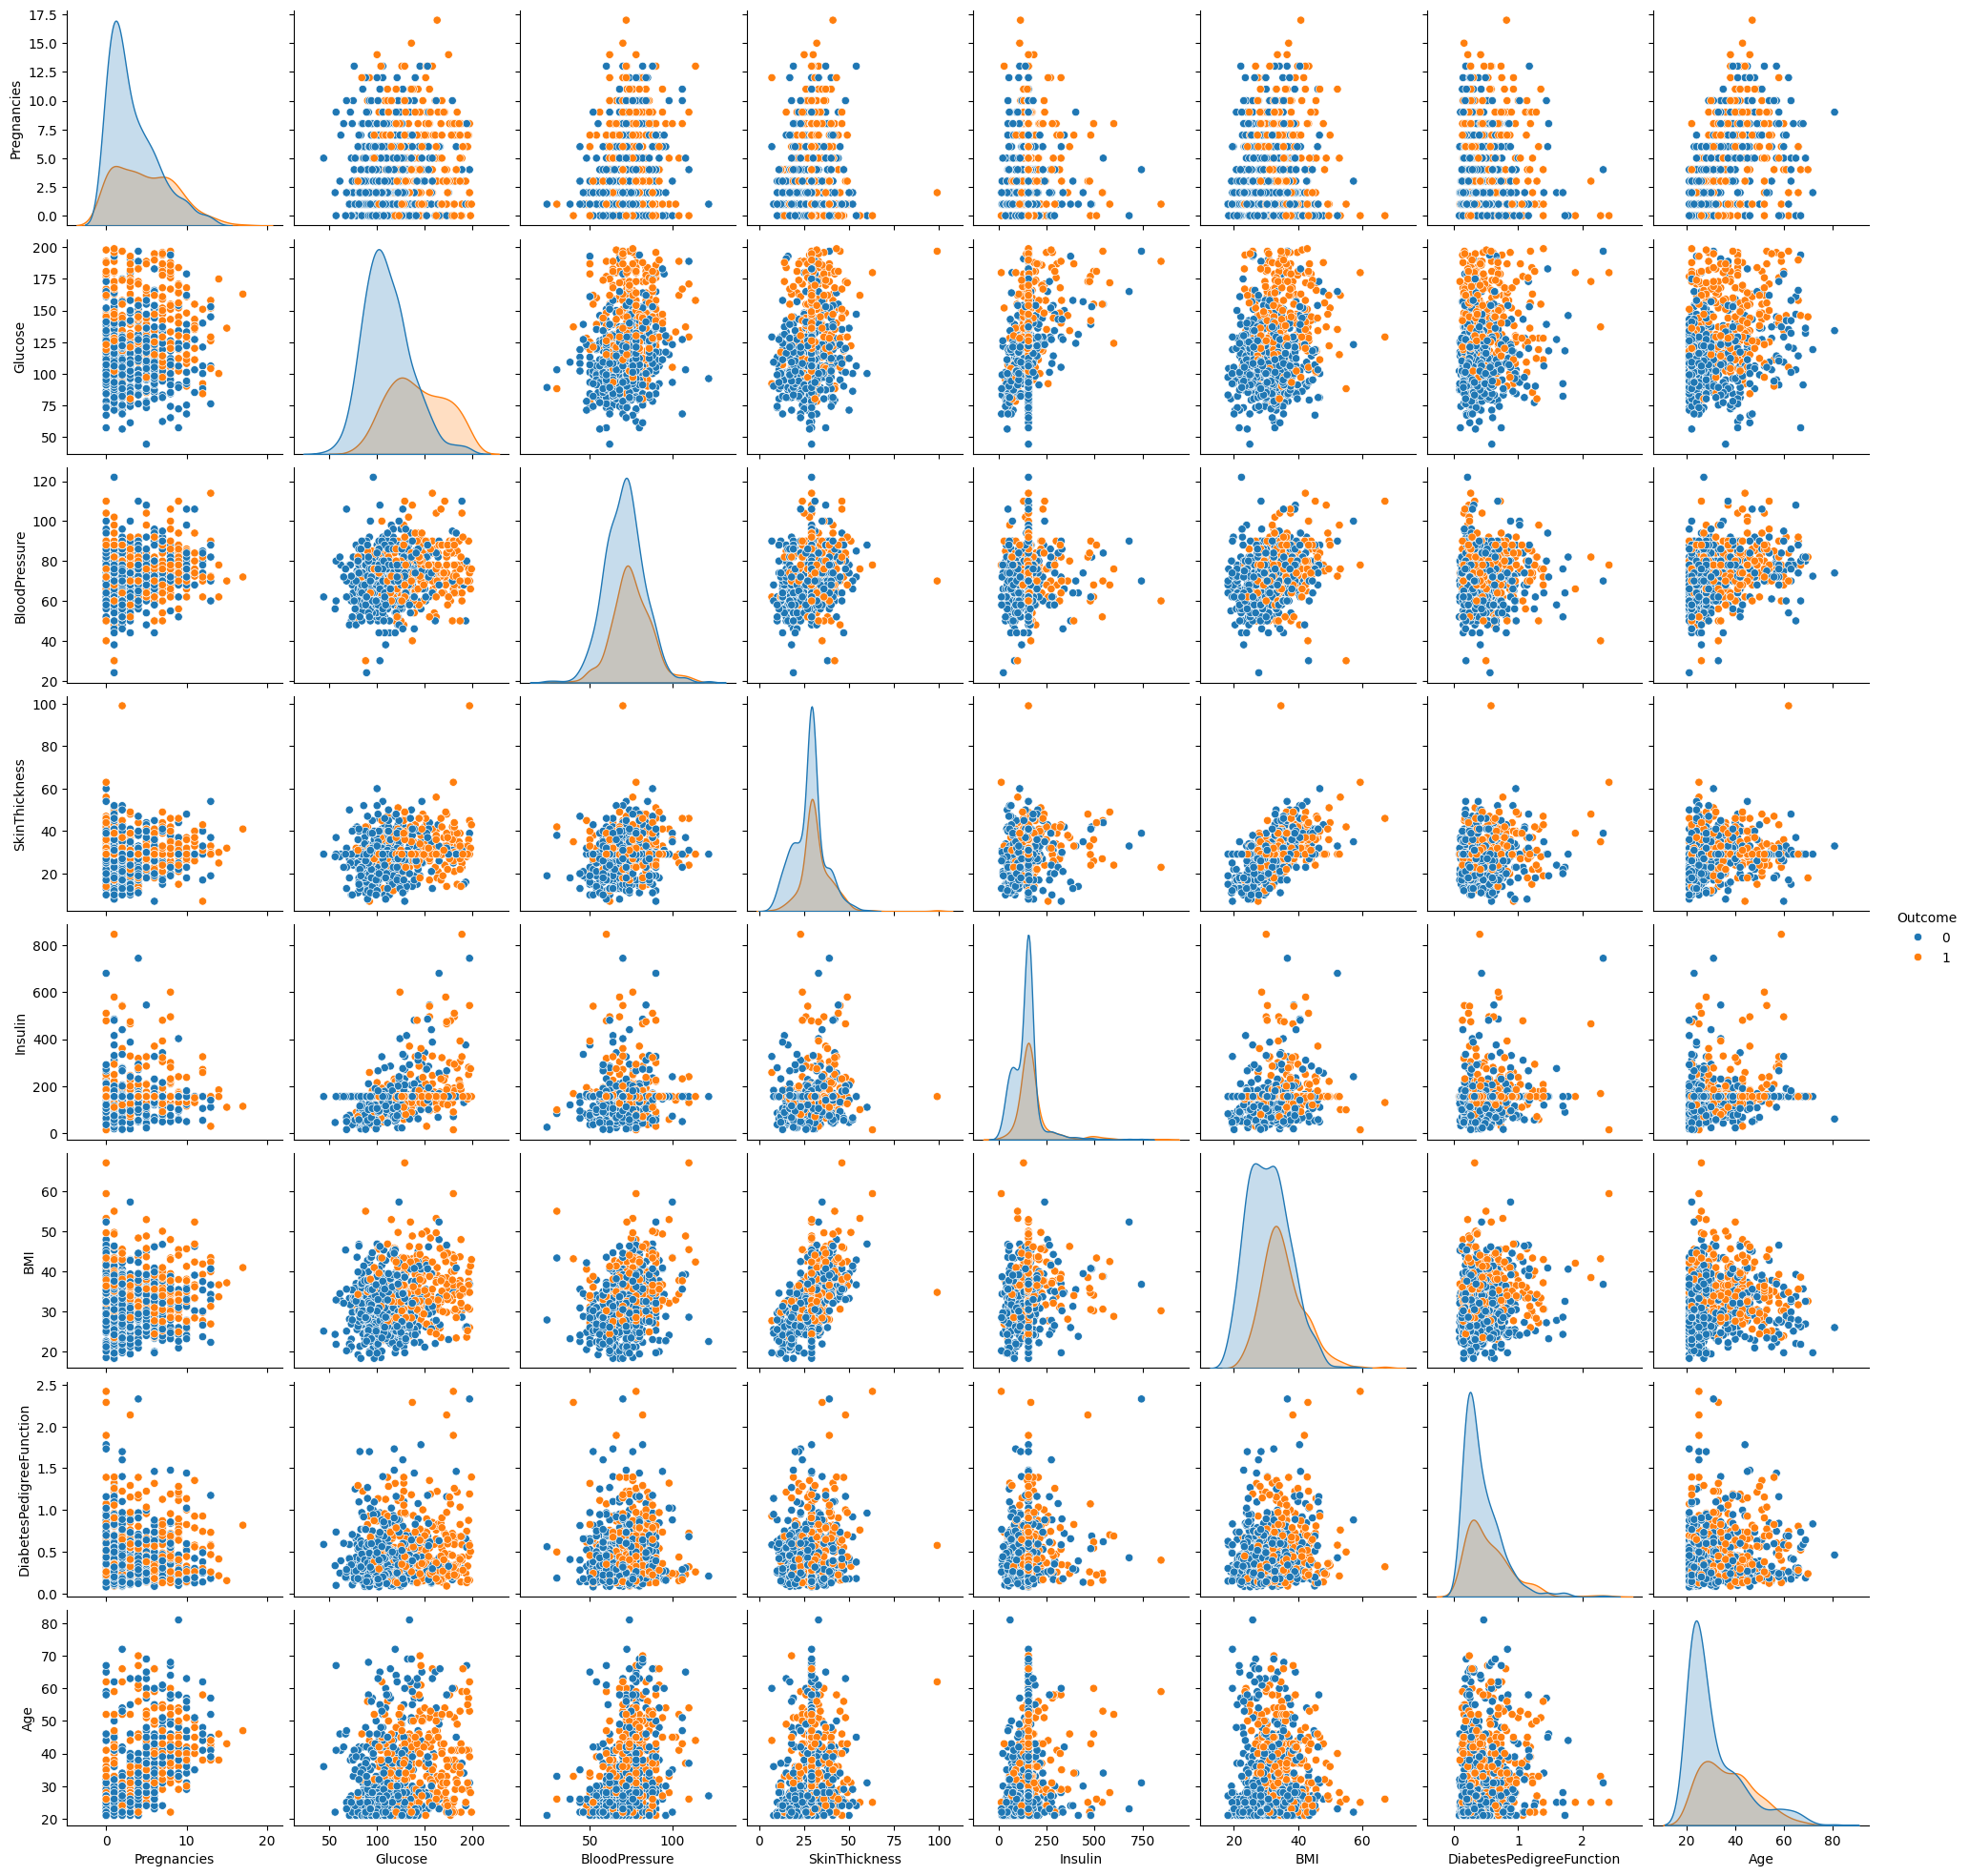

In [295]:
sns.pairplot(df, hue='Outcome')

plt.show()

As can be clearly seen, the scatterplots now show a slightly different distribution pattern given the imoutations made, though it should be said that the overall patterns have not changed dramatically. THis was just done to confirm the proper function of the prior feature engineering code and to sho the impact thereof. Now, I believe these "outliers" will not have any especially negative impact on the model acuracy (as we can later see, the acuracy of this model is altogether pretty solid).

## Data Splitting and Scaling

In [296]:
X = df.drop(columns=['Outcome'])

y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code is pretty self-explanatory as it simply splits the data into (first) X (i.e. the features used for the model and later for predicitons) and y (i.e. the target variable for the classifier model and the outcome of later predictions) and then (second) splits these two splits into one set of training (X and y ) and one set of testing sets. As the name suggests, the training set will be used to train the actual model while the testing set will be used to make a first "test" predicition to determine the accuracy and thus the quality of the model. The code defines the size of the testing dataset to be 20% of the whole dataset. THis number is pretty commonplace as it strikes a good balance between leaving sufficient data in the training set to create a good model while also providing sufficient samples to meanigfully test the model. An argument could be made that, given the samll size of the dataset, a smaller test size could have been sensible, but I think 20% is still rational.

In [297]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

Now, before starting with the model creation, I felt it necessary to scale the feature data (X_train and X_test) given the widely different absolute values of the different feature inputs (e.g. 500 max Insulin vs max 2.5 Prodigee fct). While scaling is not strictly necessary in a decision tree and/or random forest model, not scaling the data may still falsify the model given the widely diverging absolute values. Thus, not scaling the data may cause heavy overweighting of certain features that may actually not be that relevant for the actual predicition, while more important features may slightly drown in the noise of the others. The scaler I chose is the classic Standard Scaler from the sklearn library. The reason I chose that scaler was one the one hand due to its simple yet effective nature and on the other hand due to the fact that the data and the model didnt recquire any more specific scaling appraoch, thus making the simplest choice the best here. 

Note: As we will see below, the fact that I chose to scale the data requires additional considerations both in this notebook and in the streamlit app file, as obviously the input the model will get passed later in the app will have to be scaled too.

In [298]:
with open('scaler.pkl', 'wb') as scaler_file:
    
    pickle.dump(scaler, scaler_file)


Here, I used the pickle library to save the scaler as a pkl file ('scaler.pkl') to save the already fitted scaler for later use. The reason this is so important is that the streamlit application will obviously need to scale the input it gets from the front-end user interface in the prediction tab. Even if the app file applies the Standard Scaler of sklearn, it could be that there are some minor differences in the way the input is scaled, thus falsifiying the predictions of my model in the app.   

# Model Building

Before going into the Model Building section in detail, I want to quickly explain my appraoch here. Going into this model building process I first wanted to do a simple decision tree model. However, when looking at the class notes and your notebooks on the various models, I realised that a RandomForest classifier may actually produce superior results. Thus, I went ahead and trained and tested both models to determine which may provide the btter predictions (i.e. which model would have a better ROC curve and accuracy values). In the end, it turned out that RandomForest actually produced a slightly superior model, thus allowing me to make a more educated choice of model. In the following I will first go through the whole process of creating and evaluating the Decision Tree Model and then go to the RandomForest. Enjoy XD !

## Decision Tree Model

In [299]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Here I just use the Decision tree classifier from sklearn on the scaled training set of features and the training set of the target. 

In [300]:
y_pred_dt_train = decision_tree_model.predict(X_train_scaled)

Now I essentially use the traning set of the features to run a test prediction with the model I just created. 

In [301]:
conf_matrix_dt_train = confusion_matrix(y_train, y_pred_dt_train)

This code creates a confusion matrix, allowing me to visualise the actual prediciton output of my test-prediction. The actual matrix will be plotted in the next block.

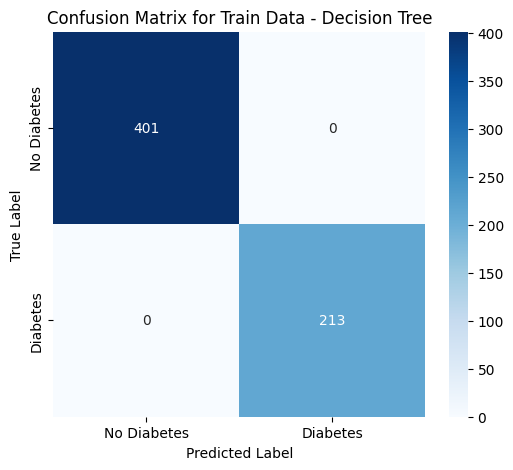

In [302]:
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix_dt_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

plt.title('Confusion Matrix for Train Data - Decision Tree')

plt.ylabel('True Label')

plt.xlabel('Predicted Label')

plt.show()

Perhaps it seems useless to plot the confusion matrix for the test prediction obtained from the training data as that prediction, logically will be perfect or at least near perfect given that it is the exact same data used for training this mning the model in the first place. However, this helps us to gain more insights from the confusion matrix below (which uses the testing data). THis is primarily due to the fact that if the outcomes of the training set predictions and that of the testing set predictions would be extremely different, that would indicate overfitting of the model to the training data. THus, this plot, while not super relevant on its own, is still important to consider.

In [303]:
y_pred_dt = decision_tree_model.predict(X_test_scaled)

Now I essentially use the testing set of the features to run a test prediction with the model I just created. 

In [304]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)


This code creates a confusion matrix, allowing me to visualise the actual prediciton output of my test-prediction. The actual matrix will be plotted in the next block.

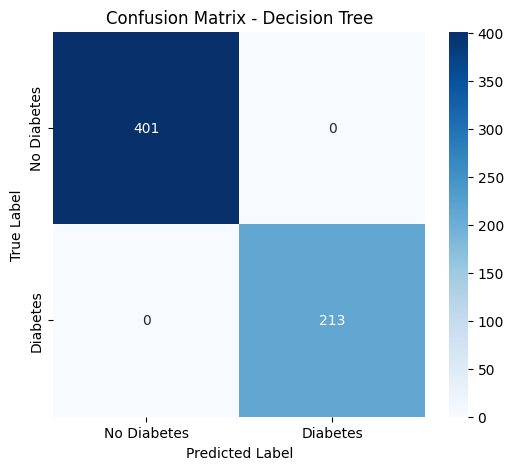

In [305]:
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix_dt_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

plt.title('Confusion Matrix - Decision Tree')

plt.ylabel('True Label')

plt.xlabel('Predicted Label')

plt.show()

Now we can actually see the test-prediction confusion matrix here. Before going into any analysis, it should be mentioned that there is a good chance that this matrix will look slightly different in terms of the values displayed when running this notebook again as the prediction may tunr out slightly different. Thus, thsi matrix serves more as a visualisation to get an overview rather than offering much interpretation and insight generation. Generally, it seems like the number of false positives and false negatives is smaller than that of true positives and true negatives respectively, which is generally a good sign but does not warrant jumping up and down from excitement. TO see the actual model quality we have to look at the classifcation report and the ROC curve below. What can be mentioned regarding model quality at this point though is that, when looking back at the training data confusion matrix and comparing it to this one, we do see that the (perhaps unsurprsingly) there is a significant difference in the accuracy of the prediction (i.e. with the testing data prediction there are significantly more false positives and false negatives). This is likely due to to a certain degree of overfitting but, in my opinion, primarily hints at a general issue that I also mentioned in the overview comments at the beginning of the notebook: the small size of the dataset. The model simply does not have enough data to learn from to be more accurate and prevent some level of overfitting.

In [306]:
class_report_dt = classification_report(y_test, y_pred_dt)

This code creates the classification report by comparing the observed target data in the test set of the target variable with the test-prediction we made above with the test feature data. 

In [307]:
print("Classification Report for Decision Tree:")
print(class_report_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



Looking at the classification report for our test prediction, we can look directly at the f1-scores for the respective outcomes of our target variable (i.e. 1 = Diabetic; 0 = No Diabetic). We can see that the f1-scores are relatively moderate-high and visibly higher for 0 than for 1. Generally, this indicates that the model is moderately capable of good predictions and signficantly better at predicting negatives (0) than positives (1) which is good as in any medical prediction model, having false positives is certainly better than having false negatives. Two things should be mentioned though: (1) judging by the classification scores, we can clearly see that this model is not good enough to be used for medical purposes and (2) there is always a trade-off between the scores for correctly predicting negatives and positives as the threshold level determines whoch of the two is (relatively speaking) higher or lower. Lets move on to the ROC curve.

In [308]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

This code creates the ROC curve by first defining the false-positive rate (fpr_dt) the true positive rate (tpr_dt) and the aforementioned threshold of the decision tree model based on the testing data and the trained model and subsequently feeding the fpr_dt variable and the tpr_dt variable (the x- and y-axis of the ROC curve respectively) into the auc() function which then creates the area under curve metric and creates rhe actual ROC curve. 

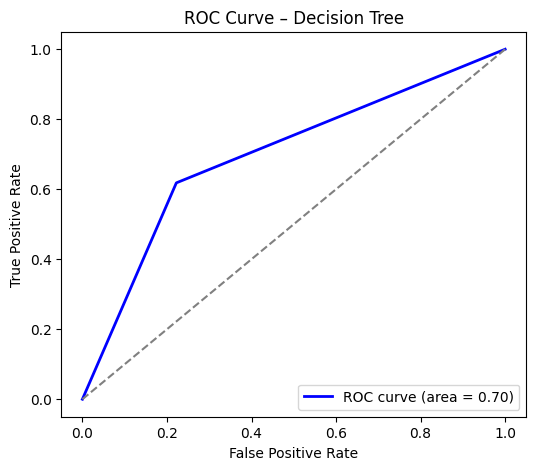

In [309]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve – Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


Here, as above for the confusion matrix, I use pyplot to plot the previously created ROC curve. THis code is written so that the AUC (area under curve) metric is displayed in the graph itself, aking it easier and quicker to evaluate the model with the ROC curve. While the ROC curve itself also offers some information the optimal threshold level and thus at the "optimal" version of this model, the important metric for this analysis is the AUC stat. As we can see this stat sits at 0.7, which backs up our previous conclusion that this decision tree model is not strong but moderately good at correctly prediciting diabetes in humans.  

In [310]:
feature_importance_dt = decision_tree_model.feature_importances_

Here I use the built in "function" of the decision tree model to create an overview of the importance of each feature for the model itself. As I will expand upon under the next block of code, this serves purely as an input for future anylses and modelling outside of this model and notebook.

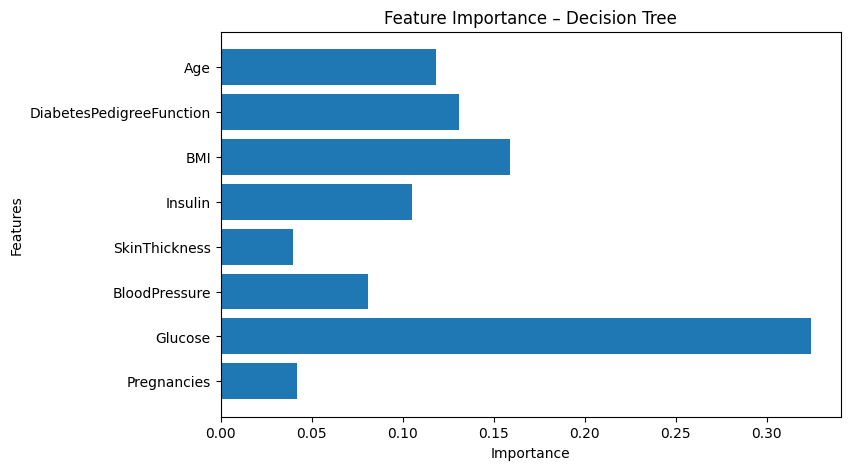

In [311]:
plt.figure(figsize=(8, 5))
plt.barh(X.columns, feature_importance_dt)
plt.title('Feature Importance – Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Now this code again uses pyplot to visualise the previously created metric of feature importance. THis visual clearly shows "Glucose" to be the most important feature for predicting the presence of Diabetes in humans (at least for this decision tree model). While some other features (e.g. "Pregnancies" and "SkinThickness") are decisively less relevant, I do not believe that this would warrant removing them from this model or from the following RandForrest model. My reasoning here is the following: when it comes to diseases where early discovery is of detrimenta importance (such as diabetes), I believe that every minute variable that can have a significant impact should be used to hone the model in on the prediction of said disease. It should be mentioned too that while signficantly less important, these features are not of NO importance at all with close to 0.05 releavnce. As already said, therefore this visual is not used to influence the approach taken in this and the following model, but rather as a means to gain insights pitentially useful for future analyses and modelling appraoches.

NOTE: As I ended up not using the Decision Tree Model I decided not to visualize the tree itself because that would not have added any value for this analysis.

## Random Forest Model

In [312]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

This code uses the RandomForestClassifier from sklearn library and fits the model on the same training data as previously the decision tree model. Technically, the number of estimators for this model could have been 'optimised' by doing Hyperparameter tuning beforehand, but there are multiple reasons I instead opted fron going with n_estimators = 150 instead. I already mentioned my thoughtprocess in the Overview text at the top of this notebook but I felt that its good to repeat them here again: First, I felt that using 150 as n_estimators was sufficent to create a relevant model while also maintaing a balance between model performance maximisation and the use of computational resources. Furthermore, I felt that given that we used this n_estimators in our previous Random Forest models, this presented a good default value to work with. Finally, I feared that my lack of experience in handling these features would blow up in my face when implementing the model later on. All-in-all we will see further down that the number of estimators setting at 150 seems to do a well enough job. In the future, however, this code could be augemented by adding this element of hyperparameter tuning (just wanted to mention this limitation for the sake of transparency).

In [313]:
y_pred_rf_train = rf_model.predict(X_train_scaled)

Now I essentially use the traning set of the features to run a test prediction with the model I just created. 

In [314]:
conf_matrix_rf_train= confusion_matrix(y_train, y_pred_rf_train)

This code creates a confusion matrix, allowing me to visualise the actual prediciton output of my test-prediction. The actual matrix will be plotted in the next block.

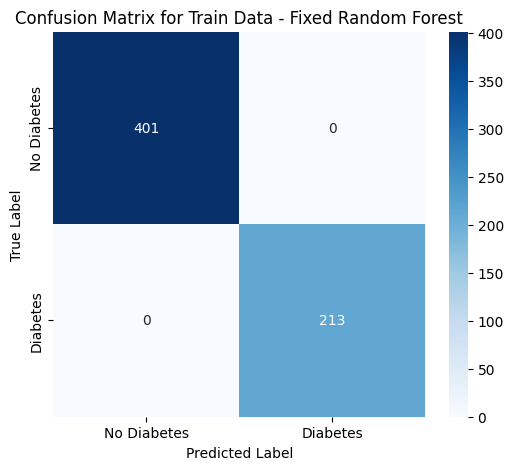

In [315]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Train Data - Fixed Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('ConfusionMatrix.png')
plt.show()
plt.close()

There is not  nothing much to say here that hasnt been said above for the decision tree model version of this. For ease of use I have pasted the same comment below so you dont have to scroll.

Perhaps it seems useless to plot the confusion matrix for the test prediction obtained from the training data as that prediction, logically will be perfect or at least near perfect given that it is the exact same data used for training this mning the model in the first place. However, this helps us to gain more insights from the confusion matrix below (which uses the testing data). THis is primarily due to the fact that if the outcomes of the training set predictions and that of the testing set predictions would be extremely different, that would indicate overfitting of the model to the training data. THus, this plot, while not super relevant on its own, is still important to consider.

In [316]:
y_pred_rf = rf_model.predict(X_test_scaled)

Now, again as with the decision tree model, I am using the test data to execute a test-prediction to evaluate the model.

In [317]:
conf_matrix_rf= confusion_matrix(y_test, y_pred_rf)

Here, I pass the observed test set outcomes and the predicted test set outcomes from the prediction above to the confusion_matrix() function to create the confusion matrix object.

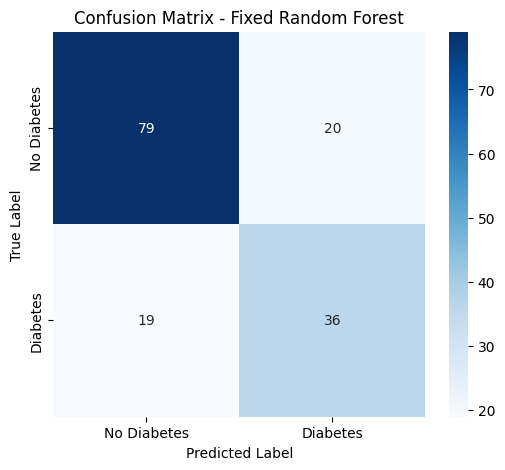

In [318]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Fixed Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('ConfusionMatrix.png')
plt.show()
plt.close()  

Again, I use pyplot to visualise the confusion matrix. There is one key difference between this code and the previous confusion matrix code: tis code saves the confusion matrix as a .png file in my assignment folder. THis was done ex-post when I decided to go with the random forest model as I wanted to include this visual into the streamlit app in a spearate tab. 
Looking at the confusion matrix we can clearly see that, as in the decision tree model, there is a clear difference between the FNs and FPs and the TNs and TPs respctively. A key difference with the randome forrest confusion matrix is, however, that the absolute value of FNs and FPs seem to be lower than in the decision tree confusion matrix. WHile this doesn't have to mean anything, it is a first indicator of the higher level of performance of the random forrest model. What can be mentioned regarding model quality at this point though is that, when looking back at the training data confusion matrix and comparing it to this one, we do see that the (perhaps unsurprsingly) there is a significant difference in the accuracy of the prediction (i.e. with the testing data prediction there are significantly more false positives and false negatives). This is likely due to to a certain degree of overfitting but, in my opinion, primarily hints at a general issue that I also mentioned in the overview comments at the beginning of the notebook: the small size of the dataset. The model simply does not have enough data to learn from to be more accurate and prevent some level of overfitting (although a Random Forest model is generally more protected against overfitting due to its averaging over multiple trees)

NOTE: The difference seems marginal but that is largely due to the fact that the dataset, and thus the testing set, is very small itself, thus making these seemingly marhinal difference more significant. 

In [319]:
class_report_rf = classification_report(y_test, y_pred_rf)

Again, this code uses the internal function classification_report() to create the metric scores for the test prediction by passing the observed adn predicted outcomes to the function.

In [320]:
report = classification_report(y_test, y_pred_rf, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df.to_csv('classification_report.csv', index=False)

print(class_report_rf)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Again, this code is similar to before but now there is also a key difference again, namely that I use pandas to turn the .txt file class_report_rf into a pandas dataframe .csv file classification_report.csv. Again, this is done to be able to properly display these metrics in the streamlit application. The benefit of putting the code in this manner is that now, every time this notebook is restarted and run, it will automatically replace the previously created files (such as this classification_report.csv) with the newly created ones, which is benefitial in case any changes to data features or models setup reaps different results (this is true for all created .png and .csv and .pkl iles in this notebook). Here, I only print out the origianl report txt for reasons of simplicity and functionality.

Now, looking at the actual output of this code, we can see that the scores improved across the board (even if only slightly by 0.02 and 0.05 respectively) which implies that the random forest model is better suited for predicting the presence of Diabetes in humans than the decision tree model above. We will further back this up in the next visual. Before continuing, however, I want to shortly touch upon the fact that the model seems to perform better with correctly predicting negative outcomes ("0" -> No Diabetes) than positive ones. There are many potentialy reasons for that but to me the imbalance of observations in the data (almost twice as many "0" as "1"), as can beseen in the Outcome histogram in the EDA, is one of the most likely reasons for this, as the model just had more negative observations to learn from.

In [321]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

This code creates the ROC curve in the exact sake way as the code above for the decision tree model. THus, I will not write anything else here.

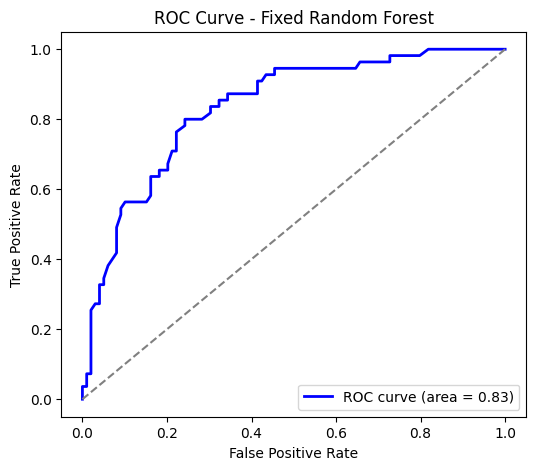

In [322]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - Fixed Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROCCurve.png')
plt.show()
plt.close()

The model has an AUC (Area Under the Curve) of 0.83, which indicates good model performance. (Just to show that I understand what the AUC is: The AUC refers to the area between the curve and the "dotted grey line" which is essentially the representation of a random guess between the two outcomes. The higher the AUC metric the better the model is at balancing between the False Positive and the True Positive rate, meaning that it is able to score a high True positive rate while not incurring a lot of false positives, which in turn relates to the threshold value used by the model to allocate the continuous value that is returned from the prediction (value between 0 an 1), to one of the two output categories (0 or 1).) A value close to 1 means that the model has a high ability to distinguish between the classes. Furthermore, the curve is steep and moves towards the top left corner, indicating that the model is performing well at identifying true positives with minimal false positives. Overall given the shape of the ROC and the increase in AUC metric, the ROC curve for this model backs up the superiortiy of the Random Forest Classifier model. 

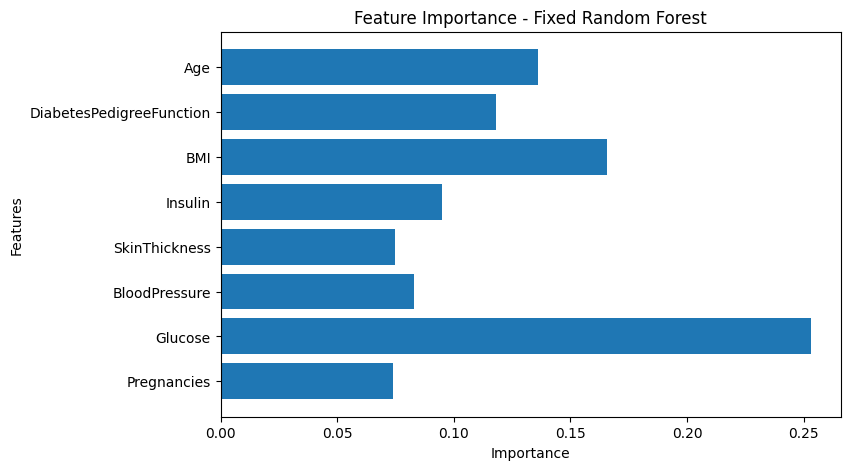

In [323]:
feature_importance_rf_fixed = rf_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(X.columns, feature_importance_rf_fixed)
plt.title('Feature Importance - Fixed Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

As we can see from comparing this feature importance graph to the previous one both models agree that Glucose is the most significant feature for making predictions, followed by BMI, DiabetesPedigreeFunction, and Age. The key differences are that first, Pregnancies appears to have a slightly higher importance in the Random Forest model compared to the Decision Tree and second, Random Forest model seems to have a more balanced distribution of feature importances across features compared to the Decision Tree, which to me indicates that the Random Forest model isbetter at capturing more subtle relatio ships between the features and the target.

In [324]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

Overall, I think the previous analysis has shown that, alebit not by lightyears, the Random Forest model is the superior prediction model for this dataset. Thus, I will save this in the model.pkl file and use it for my streamlit predictor.